# Exploration-01 Classification 문제 풀어보기 프로젝트
</br></br>

---
# 💯✌️🤖 Digits Dataset : 손글씨를 분류해 봅시다

## I. 개요

### 1. 손글씨 분류 데이터 소개 :


Scikit-Learn에서 제공하는 '손글씨 분류' 데이터를 이용해 간단한 머신러닝 프로젝트를 진행하겠습니다. 

"손글씨 분류" 데이터는 43명 참가자들이 작성한 글씨를 32x32 bitmap형태의 이미지로 구성이 되어, 4x4의 중복되지 않은 블록으로 나눠져 있습니다. 

각 원소는 0 ~ 16 범위의 실수로 만들어졌습니다. 

이미지 자료의 대한 정보와 각 이미지를 label한 target 값도 포함이 되어 있습니다. 

Target 값은 0 ~ 9 범위의 정수 값입니다.

(※ 데이터 셋에 대한 자세한 내용은 *sklearn.datasets.load_digits().DESCR* 로 확인하실 수 있습니다.) 



### 2. 프로젝트 목적 :


이 데이터셋을 이용해 주어진 손글씨 이미지 데이터를 가지고 label된 target 값을 예측해보겠습니다.

## II.  To Do :

다음과 같은 내용으로 프로젝트를 진행하겠습니다.


1. 필요한 모듈 불러오기
2. 데이터 준비
3. 데이터 이해하기
4. train, test 데이터 분리
5. 다양한 모델 학습시켜보기

## 1. 필요한 모듈 불러오기 

In [1]:
#data source library
from sklearn.datasets import load_digits

# Data manipulation library
import pandas as pd
import matplotlib.pyplot as plt

먼저 데이터를 불러오겠습니다. 

불러오기 위해서는 Scikit-Learn에서 datasets 모듈을 불러와 load_digits 클래스를 사용합니다. 

pandas와 matplotlib은 불러온 데이터를 이용해 EDA(탐색적 데이터 분석)을 할 때 사용하겠습니다. 

## 2. 데이터 준비

In [2]:
# skelarn datasets에서 load_digits 클래스 생성
ld = load_digits()

클래스는 만들어졌습니다. 클래스 속성 무엇이 있는지 확인해보겠습니다. 

In [3]:
dir(ld)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

- DESCR : 데이터셋 상세 정보
- data : 데이터(per row)
- feature_names : 데이터 필드/컬럼 이름
- frame
- images : 데이터(image format)
- target : label 값
- target_names : label 범주

## 3. EDA(Exploratory Data Analysis)

### 3.1. 데이터 이미지 확인

그럼 실제로 손글씨 데이터가 어떻게 생겼는지 확인해보겠습니다. 

첫 10개 이미지 파일을 matplotlib로 생성해보겠습니다.

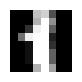

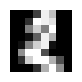

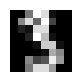

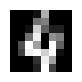

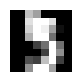

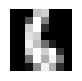

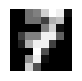

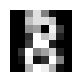

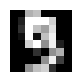

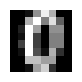

In [4]:
for i in range(1,10+1) :
    fig = plt.figure(figsize = (4,4))
    fig.add_subplot(2,5,i)
    plt.imshow(ld.images[i], cmap = 'gray')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

### 3.2 데이터 프레임 만들기

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
ld_df = pd.DataFrame(data = ld.data, columns = ld.feature_names)

pandas를 이용해서 데이터 프레임을 만들었습니다. 

데이터 프레임을 이용해서 전체적인 데이터를 탐색하겠습니다. 

기징 먼저 데이터가 어떻게 생겼는지 확인해야겠죠?

각 pixel별로 어떤 값들이 들어갔는지 볼 수 있네요.

In [7]:
ld_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Target 값은 아직 들어가 있지 않기 때문에, 

데이터 프레임에 추가하겠니다. 

In [8]:
ld_df['target'] =  ld.target

In [9]:
ld_df['target'].head()

0    0
1    1
2    2
3    3
4    4
Name: target, dtype: int64

### 3.3. 결측값 및 중복 확인

Scikit-Learn에서 제공한 데이터라 문제는 없겠지만, 데이터는 한번 더 확인해도 문제는 없겠죠?


In [10]:
# 결측값이 있는지 확인
ld_df[ld_df.isnull().any(axis=1)]

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target


In [11]:
#중복 확인
ld_df[ld_df.duplicated()]

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target


### 3.4. Target값 확인하기

데이터가 얼마나 잘 들어왔는지, 데이터의 질의 따라 예측모델의 결과도 확연히 차이가 있습니다. 

데이터의 샘플들이 균형이 잡혀 있는지 확인해보겠습니다. 

불균형한 샘플의 데이터일수록 더 많은 전처리와 특성들을 가공해야하는 작업을 진행야합니다. 

데이터를 보고 판단해보겠습니다. 

Target값에 count를 먼저 찾아보겠습니다. 

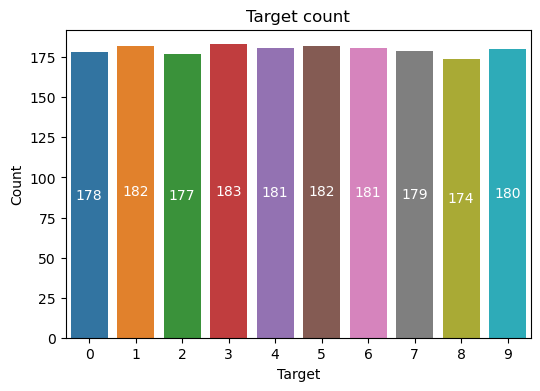

In [12]:
t = ld_df['target'].value_counts().sort_index()
plt.figure(figsize = (6,4))
ax = sns.barplot(x=t.index, y =t)
ax.bar_label(ax.containers[0], label_type='center', color ='white')
plt.title('Target count')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [13]:
ld_df['target'].value_counts().sort_index()

0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: target, dtype: int64

Target값이 균등하게 잘 들어와 있는 것 같습니다. 

각 특성들의 대한 내용도 살펴보겠습니다. 

In [14]:
ld_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [15]:
ld_df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


특성들도 특별한 이상은 없네요. 
(물론 각 특성별로 내용을 한번씩 더 보면 더 확실히 모델링할 때 안전하게 할 수 있겠죠?)

그럼 모델링으로 넘어가겠습니다. 

## 4. train, test 데이터 분리

위에서 아주 간단하게 EDA를 진행했습니다. 

머신러닝 모델을 돌리기 전에 데이터를 분리하도록 하겠습니다. 

random_state을 지정해서 결과를 traking 할 수 있도록 하겠습니다.

test_size은 데이터의 30%로 사용하겠습니다. 

※ *train, test 데이터 분리는 보통 7:3비율로 많이 진행이 되고 있다. 특별한 이유가 있는지는 찾아봐야겠다. 추축으로는 validation, test 셋을 나뉠때 통계적인 결과의 영향을 미칠거라 생각이 듭니다. 그래서 7:3 보다 좋은 결과를 줘서 많이 사용이 되고 있지 않을까 싶습니다. train data를 test데이터가 representation이 가능해야하지 않을까?* 

[참고] : https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(ld.data,
                                                    ld.target,
                                                    test_size = 0.3,
                                                    random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1257, 64)
(540, 64)
(1257,)
(540,)


## 5. 다양한 모델로 학습시켜보기

분리된 데이터를 이용해서 분류 모델을 만들어보도록 하겠습니다. 

프로젝트에서는 아래 다섯 모델을 사용하겠습니다. 

1. Decision Tree
2. Random Forest
3. SVM
4. SGD Classifier
5. Logistic Regression

### 5.1. 모델 불러오기

In [18]:
# classification model
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.svm import SVC # Support Vector machine
from sklearn.linear_model import SGDClassifier #SGD
from sklearn.linear_model import LogisticRegression

# metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#warning 
import warnings
warnings.filterwarnings('ignore')

### 5.1.2. 모델 fit 및 성능 확인

어떤 모델이 제일 정확할까요? 확인해보겠습니다. 

먼저 모델들을 학습시켜보도록 하겠습니다. 

In [19]:
dt = DecisionTreeClassifier(random_state=1)
rf = RandomForestClassifier(random_state=1)
sv = SVC()
sg = SGDClassifier()
lg = LogisticRegression()

딕셔너리로 모델들을 저장해서 for문으로 하나하나 분석하고, 

metric 정보도 저장하겠습니다. 

In [20]:
models = {'DecisionTree' :{'model': dt},'RandomForestClassifier': {'model' : rf}, 'SupportVector' : {'model' :  sv}, 'SGDClassifier' : {'model' : sg}, 'LogisticRegression' : {'model' : lg}}

In [21]:
accuracy = {}
for k,v in models.items() :
    v['model'].fit(X_train, y_train)
    p = v['model'].predict(X_test)
    v['acc'] = accuracy_score(y_test,p)
    v['conf'] = confusion_matrix(y_test, p)
    v['f1'] = f1_score(y_test,p, average = None)
    print('Model : {}; Accuracy score : {}'.format(k,v['acc']))

Model : DecisionTree; Accuracy score : 0.8629629629629629
Model : RandomForestClassifier; Accuracy score : 0.9796296296296296
Model : SupportVector; Accuracy score : 0.9851851851851852
Model : SGDClassifier; Accuracy score : 0.9592592592592593
Model : LogisticRegression; Accuracy score : 0.9685185185185186


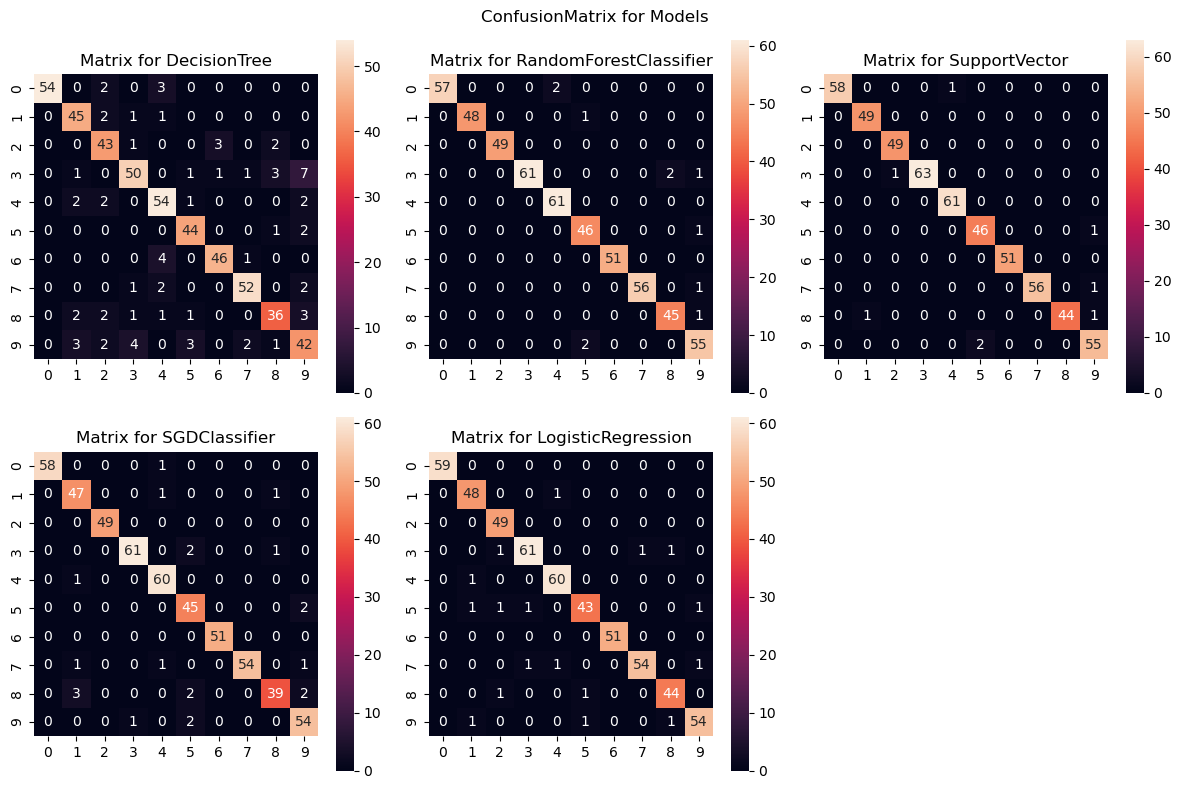

In [22]:
model_list = [k for k in models.keys()]
fig = plt.figure(figsize = (12,8))
for i, model in enumerate(model_list) :
    ax = fig.add_subplot(2,3,i+1)
    sns.heatmap(data = models[model]['conf'], annot=True, square= True)
    plt.title('Matrix for {}'.format(model))

plt.subplots_adjust(hspace= 0.2, wspace=0.2)
plt.suptitle('ConfusionMatrix for Models')
plt.tight_layout()
plt.show()

In [23]:
accuracy = { k: v['acc'] for k,v in models.items()}
accuracy = pd.DataFrame.from_dict(accuracy, orient='index', columns=['accuracy'])
acc = accuracy['accuracy'].sort_values(ascending=False)

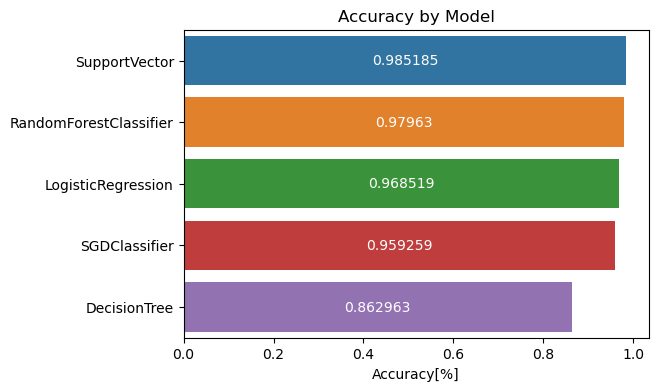

In [24]:
fig = plt.figure(figsize=(6,4))
ax = sns.barplot(x=acc, y= acc.index)
ax.bar_label(ax.containers[0], label_type='center', color ='white')
plt.title('Accuracy by Model')
plt.xlabel('Accuracy[%]')
plt.show()

모델을 모두 학습시켰습니다. 

정확도만 보고 봤을때 'SupportVector' 모델이 가장 높게 나타났습니다.

```False Negative 그리고 False Positive 모두 낮게 나오는 모델을 만들어야합니다. ```

f1 score는 recall 과 precision의 조화평균입니다. 이 두가지의 균형을 나타내주는 지표이죠?

$ f1-score = 2 * \frac{Precision * Recall}{Precision + Recall}$

그래서 f1-score을 기준으로 metric을 살펴볼 필요가 있습니다. 

그럼 f1-score 기준으로 결과를 살펴볼까요? 


In [25]:
f1 = pd.DataFrame(columns = [str(i) for i in range(10)])
for k,v in models.items():
    f = v['f1']
    f = [[i] for i in f]
    a = dict(zip([str(i) for i in range(10)], f))
    df = pd.DataFrame(a,index=[k])
    f1 = pd.concat([f1,df])

In [26]:
f1_mean = f1.mean(axis=1).sort_values()

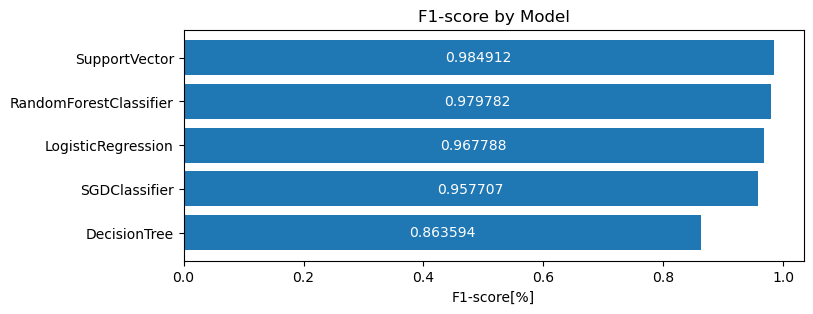

In [27]:
fig = plt.figure(figsize =(8,3))
ax = fig.add_subplot(1,1,1)
plt.barh(f1_mean.index, width =f1_mean)
ax.bar_label(ax.containers[0], label_type = 'center', color= 'white')
plt.title('F1-score by Model')
plt.xlabel('F1-score[%]')
plt.show()

결과적으로 봤을 때 SupporVector 모델이 f1-score 점수가 상대적으로 높은 것으로 나타났습니다. 

그렇다면 SupportVector을 최종적으로 선택해서 모델을 배포해야할까요?

물론 실제로 사용하는 모델이 되기위해서는 철저한 검증이 필요합니다. 

여기서는 다루지 않겠지만 ```hyperparameter tuning, cross-validation 등 또는 다른 고차원의 모델을 사용해보고 확인을 해주면 좋을 것 같습니다.```

기회가 된다면 다른 노트북에서는 optimization을 해보도록 하겠습니다. 

# III. 결론 

아주 간단하지만 머신모델을 이용해서 손글씨를 분류해봤습니다. 

먼저 target데이터와 feature들을 빠르게 살펴보았고, 

기본적으로 5개 분류 모델을 학습시켜봤습니다. 

손 글씨 같은 경우 최대한 모든 측면서 예측을 놓치고 싶지 않아서,
False Positive, False Negative 모두 낮추는 방향으로 모델을 개선해야할 필요가 있다고 생각했습니다. 

따라서 f1-score 기준으로 모델을 성능을 검증하였습니다.

이번 프로젝트에서 Support Vector 모델이 f1-score 0.98점으로 가장 높은 결과를 얻을 수 있었습니다. 

단 이 결과로 만족할 수는 없겠죠? 100점을 향해 모델 optimization도 해보는 것도 좋을 것 같네요. 모델 성능 순위가 바뀔 수 있을까요?


</br></br></br>





---
# 🍷 Wine dataset : 와인을 분류해 봅시다

# I. 개요

## 1. 와인 데이터 소개 :

이번 완인 데터셋에서도 분류 문제를 해결해 보겟습니다. 

Wine Datset은 Institute of Pharmaceutical and Food Analysis and Technologies에서 최초로 제공한 데이터입니다. 

데이터는 3개의 종류의 완인이 주어지고 이에 해당되는 몇가지 속성을 가지고 있습니다. 

Target = 'class_0', 'class_1', 'class_2'

각 와인에 대한 정보로는 13개의 feature가 주어집니다. 

    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash  
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    
자 그럼 분류문제를 풀어볼까요? 🎬 🏁

## II.  To Do :

다음과 같은 내용으로 프로젝트를 진행하겠습니다.


1. 필요한 모듈 불러오기
2. 데이터 준비
3. 데이터 이해하기
4. train, test 데이터 분리
5. 다양한 모델 학습시켜보기

## 1. 필요한 모듈 불러오기 

In [29]:
from sklearn.datasets import load_wine
import pandas as pd

먼저 데이터의 형태를 살펴봐야합니다. 

sklearn에 dataset을 불러오도록 하겠습니다.

## 2. 데이터 준비

In [30]:
wd = load_wine()

In [31]:
dir(wd)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

## 3. 데이터 이해하기 : EDA(Exploratory Data Analysis)

### 3.1 데이터 프레임 만들기


In [32]:
wdf = pd.DataFrame(data= wd.data, columns=wd.feature_names)

In [33]:
wdf.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [34]:
wdf['target'] = wd.target

In [35]:
wdf.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


### 3.2. 결측값 및 중복 확인

저는 가장 먼저 데이터의 결측값이 있는지 확인을 합니다. 

결측값이 잇을 경우, 데이터를 삭제를 할것인지, 결측값을 채울것인지 판단해야할 상황이 올것입니다. 

자세한 방법은 나중에 sklearn 모듈을 살펴봐야겠네요. 

데이터에서는 결측값이 다행히도 없는 것으로 나타나네요.


https://scikit-learn.org/stable/modules/impute.html

In [36]:
wdf.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

중복된 행도 있는지 확인해보시죠.

In [37]:
wdf.duplicated().sum()

0

### 3.4. Target값 확인하기

target 값들의 빈도를 살펴보겠습니다. 

class1 와인종류가 상대적으로 많고, 이어서 class0, class2 순으로 나타나네요. 

완전하지는 않지만 어느정도 데이터가 균형 잡혀 들어와서 분류문제를 진핼때 큰 문제는 없을 것 같습니다. 

In [38]:
wdf['target'].value_counts().sort_index()

0    59
1    71
2    48
Name: target, dtype: int64

### 3.5. feature 탐색

target값과 상관간계가 높은 feature들이 있는지 찾아보겠습니다. 

상관계수 1은 완벽한 선형 관계, -1은 완벽한 음의 선형 관계를 뜻합니다. 0의 경우는 선형 관계가 없다는 뜻입니다. 

상관계수는 나중에 feature을 선택할때 도움을 주는 지표입니다. 

target과 feature 간에 강한 선형관계가 있다면, target변수를 예측할때 영향을 많이 미치는 변수임으로 꼭 사용해야겠죠?

추가로, feature 간에 상관계수가 높으면 동일한 feature로 간주할 수도 있어서 모델 선택할때 제거할 기준으로도 잡을 수 있습니다. 

https://medium.com/swlh/all-about-the-pearson-correlation-coefficient-in-data-science-84d7cb771db0

In [39]:
feature_col = [i for i in wdf.columns]

In [40]:
wdf[['target'] + feature_col[:-1]].corr().style.background_gradient(cmap='RdYlGn')

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
target,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


flavanoids, od280/od315_of_diluted_wines, total_phenols 등 target과 높은 선형관계를 갖고 있는 것을 볼수 있습니다. 

feature간에 선형관계가 완벽에 가까운 feature는 없으니 삭제할 feature들은 보이지 않습니다. 

### 3.6. feature 기술통계량

이젠 각 feature들마다 기술통계량을 한번 살펴보도록 하겠습니다. 

보시면 std, 최소값, 최대값, 평균값 모두 제각각으로 나탑니다. 

각 feature의 범위의 규모가 다르기 때문에, 큰 규모를 가진 feature들이 모델에 영향을 미칠 수 있습니다. 

feature 정규화를 진행할 필요가 보이네요. 

맛이는 주스를 만들려면, 제료의 종류보다는 각 제료의 비율이 중요하겠죠? feature를 정규화하면 맛있는 모델이 만들어집니다. 🥤

https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

In [41]:
minmax = pd.concat([wdf.min().round(1), wdf.max().round(1),wdf.mean().round(1), wdf.std().round(1)],axis=1)
minmax.columns = ['min', 'max','mean', 'std']
minmax

,min,max,mean,std
alcohol,11.0,14.8,13.0,0.8
malic_acid,0.7,5.8,2.3,1.1
ash,1.4,3.2,2.4,0.3
alcalinity_of_ash,10.6,30.0,19.5,3.3
magnesium,70.0,162.0,99.7,14.3
total_phenols,1.0,3.9,2.3,0.6
flavanoids,0.3,5.1,2.0,1.0
nonflavanoid_phenols,0.1,0.7,0.4,0.1
proanthocyanins,0.4,3.6,1.6,0.6
color_intensity,1.3,13.0,5.1,2.3


### 3.7. Standardization or MinMax Scaling?


standardization 또는 minmax scaling을 사용해야할지 변수들이 gaussian분포를 가진지 확인하겠습니다. 

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
cols = list(wdf.columns)
cols.remove('target')
cols

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

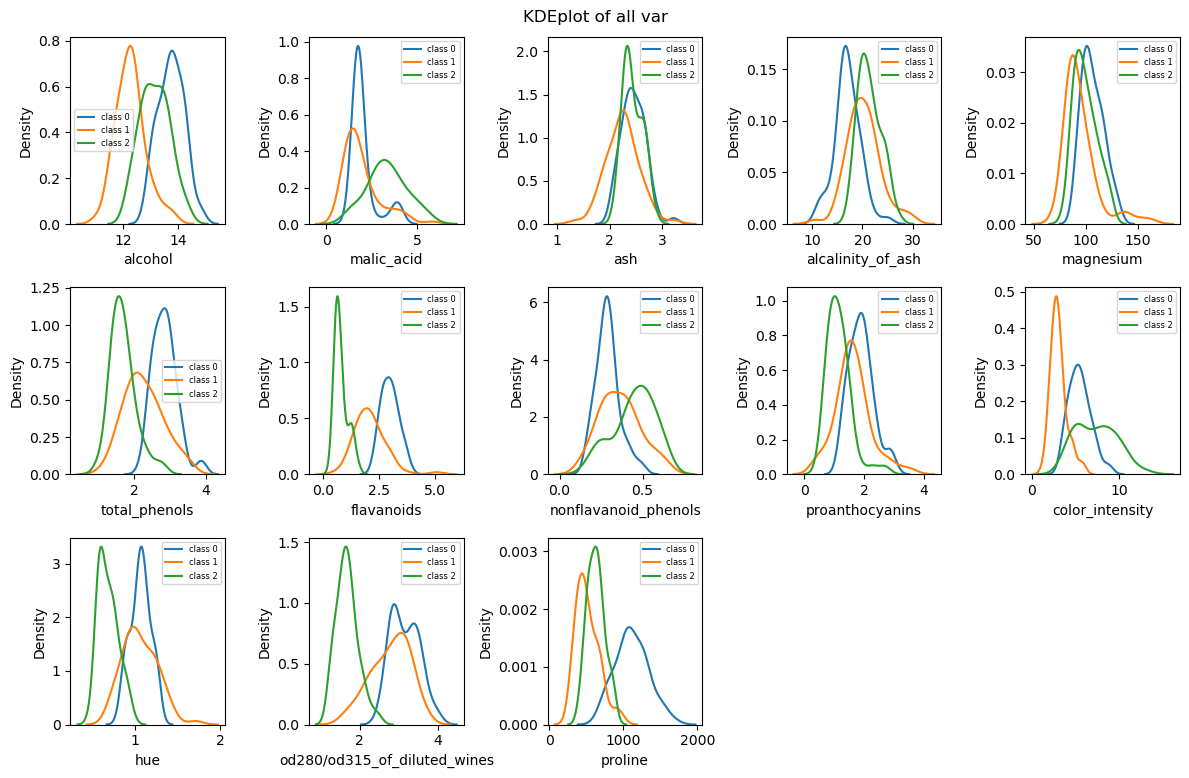

In [44]:
fig = plt.figure(figsize=(12,10))
for i, col in enumerate(cols) :
    ax = fig.add_subplot(4,5,i+1)
    sns.kdeplot(data = wdf.loc[wdf['target'] ==0], x=col, label = 'class 0')
    sns.kdeplot(data = wdf.loc[wdf['target'] ==1], x=col, label = 'class 1')
    sns.kdeplot(data = wdf.loc[wdf['target'] ==2], x=col, label = 'class 2')
    plt.legend(prop ={'size':6})
plt.suptitle('KDEplot of all var')
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.tight_layout()

plt.show()

그래프를 확인했을때 gaussian 정규분포를 가진 feature들이 있고, 그렇지 않은 feature들이 있습니다.

standardization을 최대한 활용하기 위해서는 gaussian일 필요가 있습니다.

따라서, min-max scale 모두 처리하도록 하겠습니다. 

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()

In [47]:
wdata = wd.data
scaler.fit(wdata)
scaled_data = scaler.transform(wdata)

In [48]:
scaled_data.shape

(178, 13)

자 이제 모델링으로 넘어갈 준비되었습니다. ➡️

## 4. train, test 데이터 분리

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_data, wd.target, test_size=0.3, random_state=0)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(124, 13) (54, 13)
(124,) (54,)


## 5. 다양한 모델로 학습시켜보기


이 분류 문제는 정확도뿐 아니라 f1-score 기준으로 성과를 측정하겠습니다. 

햔제 주어진 데이터로는 와인의 가격이나 지역 같은 정보가 없으니 recall 및 precision을 모두 총괄적으로 볼수 있는 f1-score을 선택하겠습니다. 

그럼 어떤 모델이 가장 성능이 좋은지 확인해보겠습니다. 

In [50]:
# classification model
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.svm import SVC # Support Vector machine
from sklearn.linear_model import SGDClassifier #SGD
from sklearn.linear_model import LogisticRegression

# metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#warning 
import warnings
warnings.filterwarnings('ignore')

In [51]:
dt = DecisionTreeClassifier(random_state=1)
rf = RandomForestClassifier(n_estimators= 15, random_state=1)
sv = SVC()
sg = SGDClassifier()
lg = LogisticRegression()

models = {'DecisionTree' :{'model': dt},'RandomForestClassifier': {'model' : rf}, 'SupportVector' : {'model' :  sv}, 'SGDClassifier' : {'model' : sg}, 'LogisticRegression' : {'model' : lg}}

In [53]:
accuracy = {}
for k,v in models.items() :
    v['model'].fit(X_train, y_train)
    p = v['model'].predict(X_test)
    v['acc'] = accuracy_score(y_test,p)
    v['conf'] = confusion_matrix(y_test,p)
    v['f1'] = f1_score(y_test,p, average = None)

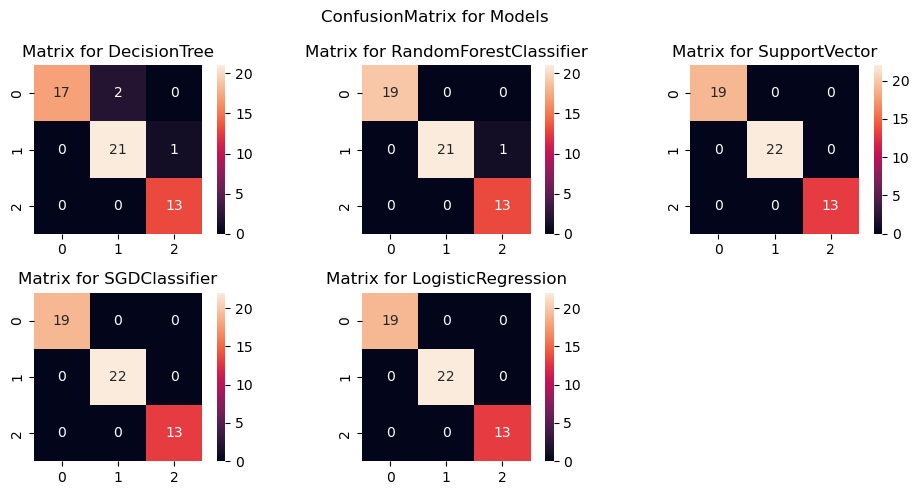

In [54]:
model_list = list(models.keys())
fig = plt.figure(figsize = (10,5))
for i, model in enumerate(model_list) :
    ax = fig.add_subplot(2,3,i+1)
    sns.heatmap(data = models[model]['conf'], annot=True, square= True)
    plt.title('Matrix for {}'.format(model))

plt.subplots_adjust(hspace= 0.2, wspace=0.2)
plt.suptitle('ConfusionMatrix for Models')
plt.tight_layout()
plt.show()

In [55]:
f1 = pd.DataFrame(columns = [str(i) for i in range(10)])
for k,v in models.items():
    f = v['f1']
    f = [[i] for i in f]
    a = dict(zip([str(i) for i in range(10)], f))
    df = pd.DataFrame(a,index=[k])
    f1 = pd.concat([f1,df])

In [56]:
f1_mean = f1.mean(axis=1).sort_values()

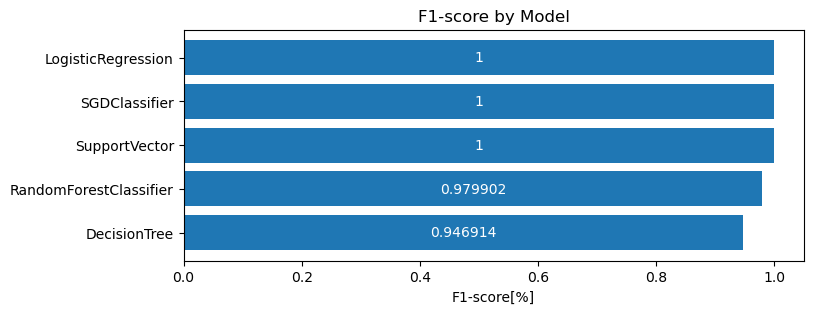

In [57]:
fig = plt.figure(figsize =(8,3))
ax = fig.add_subplot(1,1,1)
plt.barh(f1_mean.index, width =f1_mean)
ax.bar_label(ax.containers[0], label_type='center', color ='white')
plt.title('F1-score by Model')
plt.xlabel('F1-score[%]')
plt.show()

결과적으로 봤을 때 LogisticRegression, SGD, SupportVector 모델 모두 f1-score 100점이 나왔습니다. 

살짝 걱정스러운 것은 overfitting 위험요소가 보입니다. 

이런 경우에는 어떻게 해결해야할지 고민이 되네요. 

아래 링크로 들어가보니 몇가지 기법이 있는 것 같네요. 

1. Hold-out
2. Cross-validation
3. Data augmentation
4. Feature selection
5. L1 / L2 regularization
6. Remove layers / number of units per layer
7. Dropout
8. Early stopping

https://towardsdatascience.com/8-simple-techniques-to-prevent-overfitting-4d443da2ef7d


여기서는 다루지 않겠지만 기회가 된다면 다른 노트북에서는 optimization을 해보도록 하겠습니다. 

# III. 결론 

와인데이터 분류 문제를 풀어봤습니다. 

데이터 전처리 과정을 모두 거쳐서, 높은 성능 점수를 얻었습니다. 

만약 이 프로젝트가 배포를 할 수 있을까 판단해야하는 상황이라면,

점수가 너무 높게 나온 것이 걱정됩니다.

overfitting이라는 문제는 물론 underfitting 보다는 개인적으로 문제 해결하는 데

보다 가까워 졌다고는 생각합니다. 

그러나 내가 pro라면 이 문제는 꼭 해결하고 넘어가야할 문제가 아닐까요?


아직 머신러닝을 배우는 과정이고 지금까지 기본적인 내용들을 잘 숙지해온 것에 대해 뿌듯하다.

앞으로 남은 기간 동안 더욱 완전한 데이터 분석을 해보자. 🔥

</br>
</br>
</br>

---
# 🩺 Breast Cancer Dataset :  유방암 여부를 진단해 봅시다

# I. 개요.

## 1. 유방암 데이터 소개

마지막으로 유방암 여부를 진단하는 예측모델을 만들어볼 차례입니다. 

데이터는 Scikit-Learn 에서 제공하는 Breast cancer wisconsin (diagnostic) dataset입니다. 

이 데이터는 가는바늘흡인세포검사(FNA)를 통해 수집된 유방세포에 이미지를 측정한 값들입니다. 

각 세포에 대한 정보는 다음과 같습니다 :

    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)
    
 Target 또는 label 데이터는 'Malignant' 또는 'Benign'으로 분류됩니다. 
 
 그럼 주어진 569개의 샘플 데이터를 이용해 모델을 만들어 보겠습니다.
 
 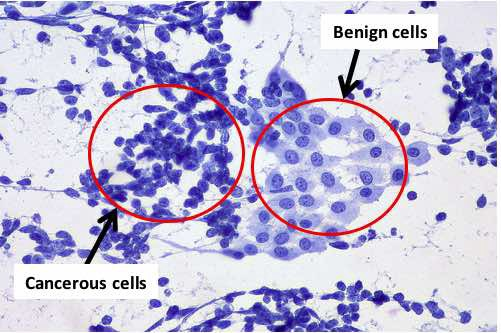

## II.  To Do :

다음과 같은 내용으로 프로젝트를 진행하겠습니다.


1. 필요한 모듈 불러오기
2. 데이터 준비
3. 데이터 이해하기
4. train, test 데이터 분리
5. 다양한 모델 학습시켜보기

## 1. 필요한 모듈 불러오기 

In [58]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. 데이터 준비

In [59]:
bd = load_breast_cancer()

In [60]:
dir(bd)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [61]:
print(bd.feature_names)
print()
print('Number of features : ',len(bd.feature_names))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Number of features :  30


In [62]:
print(bd.target_names)

['malignant' 'benign']


## 3. EDA(Exploratory Data Analysis)

### 3.1 데이터 프레임 만들기

In [63]:
bdf = pd.DataFrame(data = bd.data, columns = bd.feature_names)

In [64]:
bdf.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [65]:
bdf['target'] = bd.target

In [66]:
bdf['target'].head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

569개의 샘플과 30개의 features로 구성이된 데이터로 확인됩니다.

In [67]:
print(bdf.shape) # target 제외시 30

(569, 31)


In [68]:
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### 3.4. Target값 확인하기

target 값들의 빈도를 살펴보겠습니다. 

malignant 샘플이 benign 대비 살짝 많은 것으로 나타나네요. 

분류문제에 큰 문제는 없을 것 같습니다. 

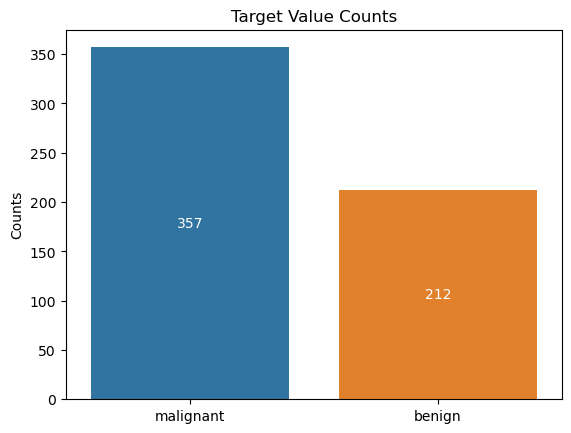

In [69]:
t1 = bdf['target'].value_counts()
ax = sns.barplot(x=['malignant','benign'],y=t1)
ax.bar_label(ax.containers[0], label_type='center', color='white')
plt.title('Target Value Counts')
plt.ylabel('Counts')
plt.show()

### 3.5. feature 탐색

In [70]:
bdf.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


feature들을 describe 함수를 이용해 살펴봤습니다. 

'mean', 'worst', 'error' 등으로 분류되어 있는 것을 확인했습니다. 

feature가 너무 많아서 살펴보기가 힘드네요. 나눠서 분석해보도록 하겠습니다. 

큰 3가지 분류로 feature들을 먼저 탐색해보겠습니다.

In [71]:
mean_col = [i for i in bdf.columns if 'mean' in i]
print(mean_col)
worst_col = [i for i in bdf.columns if 'worst' in i]
print(worst_col)
error_col = [i for i in bdf.columns if 'error' in i ]
print(error_col)

['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']
['worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
['radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error']


### 3.5.1. 'mean' features

최소, 최대, 평균, 표준편차 등 모두 범위가 다른 것을 확인했습니다. 

`feature scaling`이 꼭 필요한 것으로 판단되네요. 

In [72]:
bdf[mean_col].describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


Target 변수의 상관계수를 살펴보면 음의 선형관계가 뚜렷이 강한 몇가지 변수들이 보이네요.

`mean concave points`, `mean radius`, `mean perimeter` 등이 높게(0.7<) 나타납니다. 

feature 간에 선형관계가 강한(0.9<) 것들도 보이네요. 

상관관계가 높으면 중복으로 feature를 넣은 것처럼 예측 모델에 불필요한 정보가 될 수 있습니다. 

전처리 과정에서 상관계수가 0.9 이상인 feature들은 제외하는 것도 좋을 것 같습니다.

0.9 이상은 feature :

- mean area & mean perimeter(0.99)
- mean radius & mean perimeter(0.99)
- mean radius & mean perimeter(0.99)
- mean concavity & mean concave points(0.92)

보시면 알겠지만 area, perimeter은 모두 radius로 계산되어서 나온 feature들임으로

상관계수가 높을 수 밖에 없습니다.

https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

In [73]:
bdf[['target'] + mean_col].corr().style.background_gradient(cmap ='RdYlGn')

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
target,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,-0.330499,0.012838
mean radius,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
mean texture,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
mean perimeter,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
mean area,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
mean smoothness,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
mean compactness,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
mean concavity,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
mean concave points,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
mean symmetry,-0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


조금 더 자세하게 보기 위해서 target value로 분리해서 분산을 확인하겠습니다.

그래프를 통해 feature들을 확인했을 때 gaussian 분포인 것을 볼 수 있습니다. 

feature들마다 범위가 다르기 때문에 Standardization으로 표준화하도록 하겠습니다. 

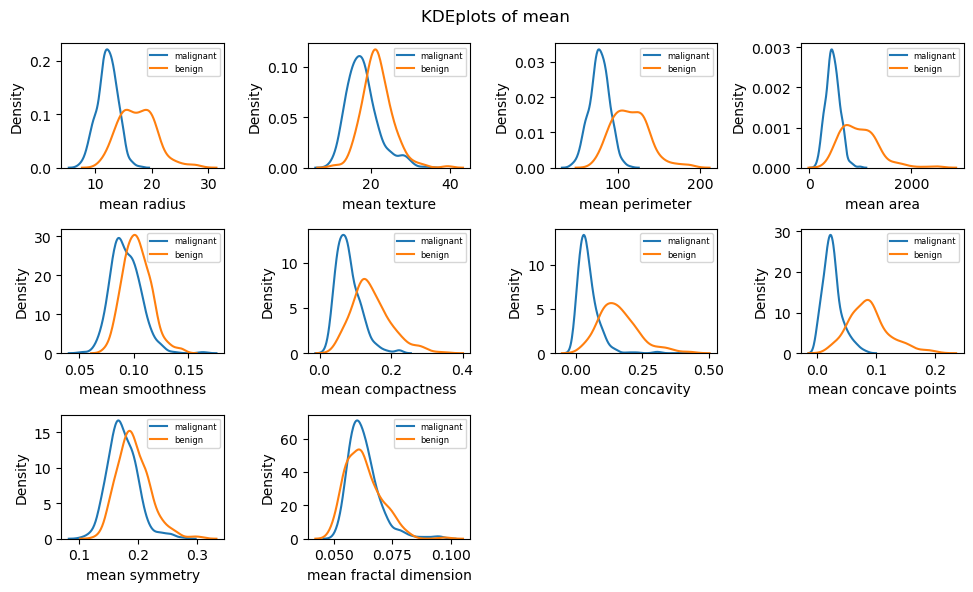

In [74]:
fig = plt.figure(figsize = (10,6))
for i, col in enumerate(mean_col) :
    ax = fig.add_subplot(3,4, i+1)
    sns.kdeplot(data = bdf.loc[bdf['target'] ==1], x = col, label= 'malignant')
    sns.kdeplot(data = bdf.loc[bdf['target'] ==0], x = col,  label= 'benign')
    plt.legend(prop={'size': 6})
plt.suptitle('KDEplots of mean')
plt.subplots_adjust(hspace= 0.2, wspace=0.2)
plt.tight_layout()
plt.show()

그래프를 확인하면 target별로 `raidus`, `permiter`,`area`, `concavity`, `concave point` 처럼 확실히 분류가 보이는 feature들이 보이네요. 'error' 그리고 'worst' 분류에서도 동일한지 확인해보겠습니다. 

### 3.5.2. 'error' features

In [75]:
bdf[error_col].describe()

,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795
std,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646
min,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895
25%,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248
50%,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187
75%,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558
max,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840


error feature도 마찬가지로 위에서 본것과 비슷하게 상관계수가 높은 변수들이 있는 것을 볼 수 있습니다. 

- mean area & mean perimeter(0.93)
- mean radius & mean perimeter(0.97)
- mean radius & mean perimeter(0.95)

In [76]:
bdf[['target'] + error_col].corr().style.background_gradient(cmap ='RdYlGn')

,target,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
target,1.000000,-0.567134,0.008303,-0.556141,-0.548236,0.067016,-0.292999,-0.253730,-0.408042,0.006522,-0.077972
radius error,-0.567134,1.000000,0.213247,0.972794,0.951830,0.164514,0.356065,0.332358,0.513346,0.240567,0.227754
texture error,0.008303,0.213247,1.000000,0.223171,0.111567,0.397243,0.231700,0.194998,0.230283,0.411621,0.279723
perimeter error,-0.556141,0.972794,0.223171,1.000000,0.937655,0.151075,0.416322,0.362482,0.556264,0.266487,0.244143
area error,-0.548236,0.951830,0.111567,0.937655,1.000000,0.075150,0.284840,0.270895,0.415730,0.134109,0.127071
smoothness error,0.067016,0.164514,0.397243,0.151075,0.075150,1.000000,0.336696,0.268685,0.328429,0.413506,0.427374
compactness error,-0.292999,0.356065,0.231700,0.416322,0.284840,0.336696,1.000000,0.801268,0.744083,0.394713,0.803269
concavity error,-0.253730,0.332358,0.194998,0.362482,0.270895,0.268685,0.801268,1.000000,0.771804,0.309429,0.727372
concave points error,-0.408042,0.513346,0.230283,0.556264,0.415730,0.328429,0.744083,0.771804,1.000000,0.312780,0.611044
symmetry error,0.006522,0.240567,0.411621,0.266487,0.134109,0.413506,0.394713,0.309429,0.312780,1.000000,0.369078


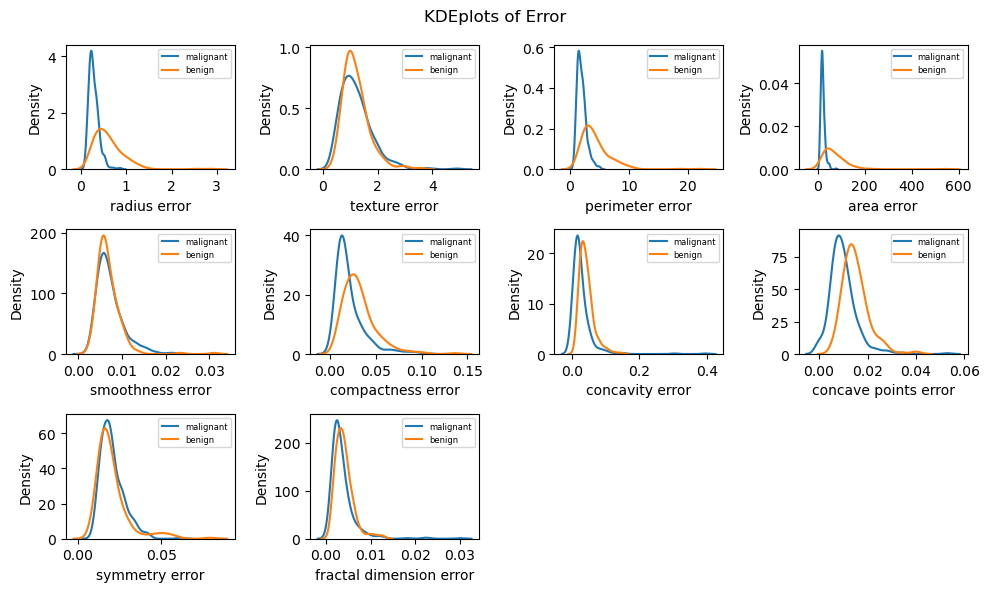

In [77]:
fig = plt.figure(figsize = (10,6))
for i, col in enumerate(error_col) :
    ax = fig.add_subplot(3,4, i+1)
    sns.kdeplot(data = bdf.loc[bdf['target'] ==1], x = col, label= 'malignant')
    sns.kdeplot(data = bdf.loc[bdf['target'] ==0], x = col,  label= 'benign')
    plt.legend(prop={'size': 6})
plt.suptitle('KDEplots of Error')
plt.subplots_adjust(hspace= 0.2, wspace=0.2)
plt.tight_layout()
plt.show()

`error` 분류에서도 역시 `radius`, `perimeter`, `area` feature들이 target 변수를 분류하는데 가장 영향을 많이 미칠것으로 보이네요.

### 3.5.3. 'worst' features

In [78]:
bdf[worst_col].describe()

,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


worst feature도 마찬가지로 위에서 본것과 비슷하게 상관계수가 높은 변수들이 있는 것을 볼 수 있습니다. 

- mean area & mean perimeter(0.97)
- mean radius & mean perimeter(0.99)
- mean radius & mean perimeter(0.98)

In [79]:
bdf[['target'] + worst_col].corr().style.background_gradient(cmap ='RdYlGn')

,target,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,1.000000,-0.776454,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294,-0.323872
worst radius,-0.776454,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492
worst texture,-0.456903,0.359921,1.000000,0.365098,0.345842,0.225429,0.360832,0.368366,0.359755,0.233027,0.219122
worst perimeter,-0.782914,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957
worst area,-0.733825,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647
worst smoothness,-0.421465,0.216574,0.225429,0.236775,0.209145,1.000000,0.568187,0.518523,0.547691,0.493838,0.617624
worst compactness,-0.590998,0.475820,0.360832,0.529408,0.438296,0.568187,1.000000,0.892261,0.801080,0.614441,0.810455
worst concavity,-0.659610,0.573975,0.368366,0.618344,0.543331,0.518523,0.892261,1.000000,0.855434,0.532520,0.686511
worst concave points,-0.793566,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114
worst symmetry,-0.416294,0.243529,0.233027,0.269493,0.209146,0.493838,0.614441,0.532520,0.502528,1.000000,0.537848


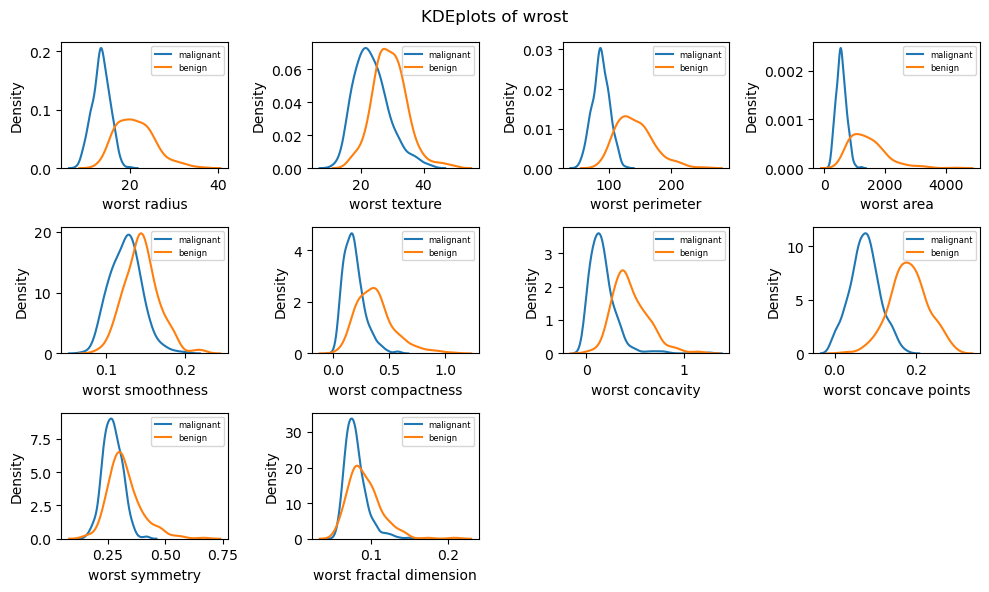

In [80]:
fig = plt.figure(figsize = (10,6))
for i, col in enumerate(worst_col) :
    ax = fig.add_subplot(3,4, i+1)
    sns.kdeplot(data = bdf.loc[bdf['target'] ==1], x = col, label= 'malignant')
    sns.kdeplot(data = bdf.loc[bdf['target'] ==0], x = col,  label= 'benign')
    plt.legend(prop={'size': 6})
plt.suptitle('KDEplots of wrost')
plt.subplots_adjust(hspace= 0.2, wspace=0.2)
plt.tight_layout()
plt.show()

`worst` 분류에서는 `radius`, `perimeter`, `area`, `compactness`, `concave point` feature들이 target 변수를 분류하는데 가장 영향을 많이 미칠 것으로 보입니다.

### 3.7. Preprocessing : Standardization and feature selection


위에 EDA에서 상관계수가 높은 feature 쌍들이 있었습니다. 

target변수와 상관계수가 종합적으로 봤을 때 가장 높은 perimeter을 남기고,

radius 그리고 area feature를 제외하겠습니다.

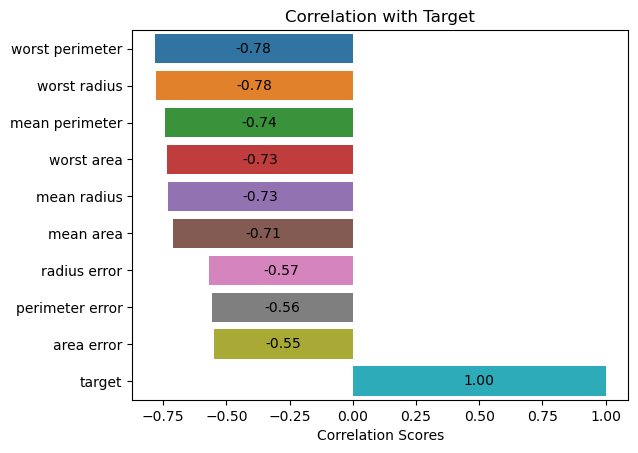

In [81]:
rad_per_area = [i for i in bdf.columns if 'radius' in i or 'perimeter' in i or 'area' in i]
rad_per_area_corr = bdf[['target'] + rad_per_area].corr()['target'].sort_values()
ax = sns.barplot(y = rad_per_area_corr.index, x =rad_per_area_corr)
ax.bar_label(ax.containers[0], labels = [f'{x:.2f}' for x in ax.containers[0].datavalues] ,label_type= 'center')
plt.title('Correlation with Target')
plt.xlabel('Correlation Scores')
plt.show()

In [82]:
select_not = [i for i in bdf.columns if 'radius' in i or 'area' in i]
select_feature = list(set(bdf.columns)- set(select_not))
target = bdf['target']
trainset = bdf[select_feature].copy().drop('target',axis=1)
print(trainset.columns)
print(target)

Index(['mean texture', 'concave points error', 'worst concave points',
       'perimeter error', 'texture error', 'fractal dimension error',
       'worst concavity', 'symmetry error', 'mean fractal dimension',
       'worst texture', 'mean concavity', 'worst compactness',
       'smoothness error', 'mean concave points', 'mean symmetry',
       'worst smoothness', 'compactness error', 'concavity error',
       'mean smoothness', 'mean compactness', 'worst perimeter',
       'worst symmetry', 'mean perimeter', 'worst fractal dimension'],
      dtype='object')
0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64


In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(trainset)
train_dataset = scaler.transform(trainset)
train_dataset

array([[-2.07333501,  0.66081994,  2.29607613, ...,  2.75062224,
         1.26993369,  1.93701461],
       [-0.35363241,  0.26016207,  1.0870843 , ..., -0.24388967,
         1.68595471,  0.28118999],
       [ 0.45618695,  1.42482747,  1.95500035, ...,  1.152255  ,
         1.56650313,  0.20139121],
       ...,
       [ 2.0455738 ,  0.61215704,  0.41406869, ..., -1.10454895,
         0.67267578, -0.31840916],
       [ 2.33645719,  0.78572138,  2.28998549, ...,  1.91908301,
         1.98252415,  2.21963528],
       [ 1.22179204, -1.91344745, -1.74506282, ..., -0.04813821,
        -1.81438851, -0.75120669]])

feature selection 과 표준화 작업을 모두 완료하였습니다. 

그럼 모델링으로 넘어가도록 하겠습니다. 

## 4. train, test 데이터 분리

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_dataset, target, test_size=0.3, random_state=0)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(398, 24) (171, 24)
(398,) (171,)


## 5. 다양한 모델로 학습시켜보기

본 모델에서의 sensitivity가 중요한 문제로 보입니다. 

실제로는 malignant이지만 benign으로 분류되는 경우 치료가 필요한 환자를 노칠 수 있습니다.

따라서 분류 문제에서 Recall로 성능을 평가하겠습니다. 

| 분류| | |
|--:|:----:|:----:|
| | True | False |
|True| malignant(TP) | malignant but benign (FP)|
|False| benign but malignant(FN) | benign(TN) |

재현율(Recall)은 다음의 식으로 계산이 됩니다 :

$$Recall = \frac{True Positive}{True Positive + False Negative}$$

그럼 어떤 모델이 가장 성능이 좋은지 확인해보겠습니다.

In [85]:
# classification model
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.svm import SVC # Support Vector machine
from sklearn.linear_model import SGDClassifier #SGD
from sklearn.linear_model import LogisticRegression

# metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

#warning 
import warnings
warnings.filterwarnings('ignore')

In [86]:
dt = DecisionTreeClassifier(random_state=1)
rf = RandomForestClassifier(random_state=1)
sv = SVC()
sg = SGDClassifier()
lg = LogisticRegression()

models = {'DecisionTree' :{'model': dt},'RandomForestClassifier': {'model' : rf}, 'SupportVector' : {'model' :  sv}, 'SGDClassifier' : {'model' : sg}, 'LogisticRegression' : {'model' : lg}}

In [87]:
for k,v in models.items() :
    v['model'].fit(X_train, y_train)
    p = v['model'].predict(X_test)
    v['acc'] = accuracy_score(y_test,p)
    v['recall'] = recall_score(y_test,p)
    v['conf'] = confusion_matrix(y_test, p)
    v['f1'] = f1_score(y_test, p ,average = None)
    print('Model : {}; recall-score : {}'.format(k,v['recall']))

Model : DecisionTree; recall-score : 0.8888888888888888
Model : RandomForestClassifier; recall-score : 0.9814814814814815
Model : SupportVector; recall-score : 0.9814814814814815
Model : SGDClassifier; recall-score : 0.9722222222222222
Model : LogisticRegression; recall-score : 0.9907407407407407


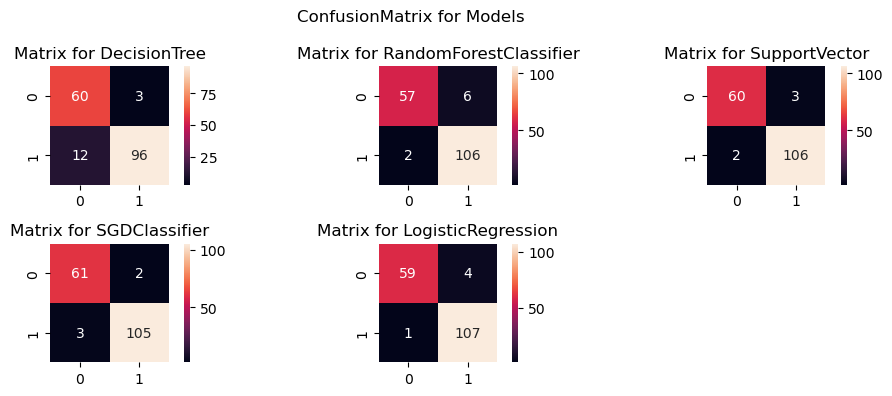

In [88]:
fig = plt.figure(figsize = (10,4))
for i, model in enumerate(model_list) :
    ax = fig.add_subplot(2,3,i+1)
    sns.heatmap(data = models[model]['conf'], annot=True, square= True, fmt= '1.0f')
    plt.title('Matrix for {}'.format(model))

plt.subplots_adjust(hspace= 0.2, wspace=0.2)
plt.suptitle('ConfusionMatrix for Models')
plt.tight_layout()
plt.show()

In [89]:
recall = { k: v['recall'] for k,v in models.items()}
recall = pd.DataFrame.from_dict(recall, orient= 'index', columns=['recall'])
recall = recall.recall.sort_values(ascending=False)

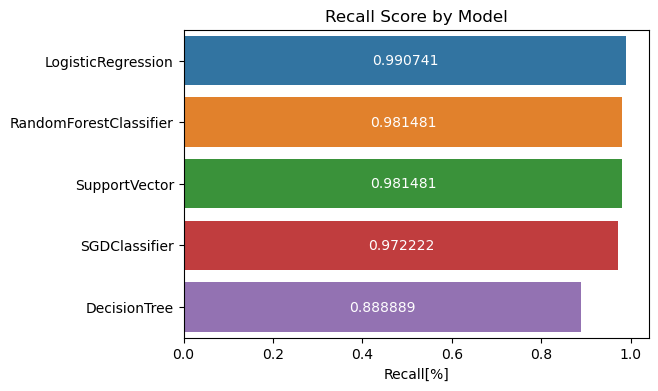

In [90]:
fig = plt.figure(figsize=(6,4))
ax = sns.barplot(x=recall, y= recall.index)
ax.bar_label(ax.containers[0], label_type='center', color ='white')
plt.title('Recall Score by Model')
plt.xlabel('Recall[%]')
plt.show()

# III. 결론 

모델 성능을 평가하였습니다. 

결과적으로 봤을때 Logistic Regression이 sensitivity 가장 높게 나타났습니다. 

171개 테스트 셋을 예측하였을때 1개의 FN이 나왔습니다. 

---

지금까지 유방암 유무를 진단해주는 모델을 만들었습니다. 

기본적인 데이터 탐색을 하였고, feature selection, feature scaling을 통해 모델 전처리 작업이 이루어졌습니다. 

5개의 모델을 테스트하였고, Logistic Regression의 성능이 제일 우수했습니다. 

물론 지금까지는 매우 간단한 모델링으로 작업이 끝났습니다. 

현재보다 안정적인 모델을 만들기 위해서는 추후에 hyper paremeter optimization, feature engineering 등 작업도 진행해야하겠습니다. 

아직 모델링의 첫 걸음마를 때고 있습니다. 

많이 부족하다고 여전히 느끼고 있지만, 현재 노트북을 baseline으로 잡고 더 발전하겠습니다. 

끝까지 읽어주셔서 감사합니다! 🔥

---